#                               Wine Reviews Model
<br>

Using Dataset from [Kaggle](https://www.kaggle.com/zynicide/wine-reviews) for practice statistical concepts 

## Importing libraries

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 2.2.2
sklearn: 0.19.1
scipy: 1.1.0
seaborn: 0.8.1
pandas: 0.23.0
numpy: 1.14.3
Python: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]


#### Import Dataset

In [15]:
df = pd.read_csv('winemag-data-130k-v2.csv')

#### Dataset dimension and shape

In [21]:
print('Dimension: ', df.shape)

Dimension:  (129971, 14)


#### Review first 5 rows of dataset

In [9]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### Review random 5 rows of dataset

In [24]:
df.sample(5)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
87228,87228,France,A curious bitterness lies at the back of this ...,Premier Cru Brut,86,58.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Bertrand-Delespierre NV Premier Cru Brut (Cha...,Champagne Blend,Bertrand-Delespierre
27897,27897,US,"Scents of waxy lemon peel, lanolin, fresh herb...",RTR Vineyard Dry,89,19.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Red Tail Ridge 2011 RTR Vineyard Dry Riesling ...,Riesling,Red Tail Ridge
69628,69628,Italy,Intense aromas of red cherry and wildflower op...,Missianer Vernatsch,89,17.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,St. Pauls 2013 Missianer Vernatsch Schiava (Al...,Schiava,St. Pauls
336,336,Chile,"Gritty, heavily roasted aromas of peanuts and ...",Costa,83,35.0,Colchagua Costa,NaN,NaN,Michael Schachner,@wineschach,Koyle 2015 Costa Pinot Noir (Colchagua Costa),Pinot Noir,Koyle
62658,62658,Greece,"Orange peel, spice and lemon aromas start this...",NaN,90,13.0,Patras,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Loukatos NV Muscat (Patras),Muscat,Loukatos


## Wine tasters analysis 

We will try to find different stats based people who have tasted and rated the wines. Based on dataset, rating are ranging from 0-100.

We will use these two fields to find insights:
- taster_name
- taster_twitter_handle

First step will be to separate null and non-nulll values

In [173]:
reviewsWithNullTasterNameOrTwitterHandle = df[df['taster_name'].isna() | df['taster_twitter_handle'].isna()]
reviewsWithNullTasterNameOrTwitterHandle.shape

(31213, 14)

In [174]:
reviewsWithNonNullTasterNameOrTwitterHandle = df.dropna(subset=['taster_name', 'taster_twitter_handle'])
reviewsWithNonNullTasterNameOrTwitterHandle.shape

(98758, 14)

*Note: Sum of dimension of null and non-null dataframes should be equal to dimesion of orginal dataframe, i.e, $ df.x = reviewsWithNullTasterNameOrTwitterHandle.x + reviewsWithNonNullTasterNameOrTwitterHandle.x $*

In [175]:
uniqueUsers = reviewsWithNonNullTasterNameOrTwitterHandle['taster_name'].unique().size
print('Unqiue number of wine tasters', uniqueUsers)
df['taster_name'].value_counts()

Unqiue number of wine tasters 16


Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

** Plot of number of wine reviews wrt taster name whose twitter handle is not na**

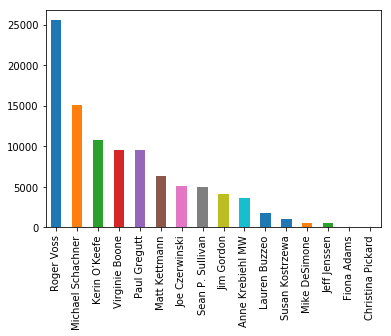

In [190]:
reviewsWithNonNullTasterNameOrTwitterHandle['taster_name'].value_counts().plot.bar()

In [177]:
reviewsWithNonNullTasterNameOrTwitterHandle.groupby(['taster_name'])['points'].agg(['min', 'max', 'mean', 'median', 'std', 'size']).sort_values('size', ascending=False)

,min,max,mean,median,std,size
taster_name,,,,,,
Roger Voss,80,100,88.708003,88,3.036373,25514
Michael Schachner,80,98,86.907493,87,3.022859,15134
Kerin O’Keefe,80,100,88.867947,89,2.474240,10776
Virginie Boone,80,99,89.213379,90,2.996796,9537
Paul Gregutt,80,100,89.082564,89,2.814445,9532
Matt Kettmann,81,97,90.008686,90,2.571257,6332
Joe Czerwinski,80,100,88.536235,89,2.858701,5147
Sean P. Sullivan,80,97,88.755739,89,2.458547,4966
Jim Gordon,80,97,88.626287,89,2.698341,4177


In [178]:
reviewsWithNullTasterNameOrTwitterHandle.groupby(['taster_name'])['points'].agg(['min', 'max', 'mean', 'median', 'std', 'size']).sort_values('size', ascending=False)

,min,max,mean,median,std,size
taster_name,,,,,,
Anna Lee C. Iijima,80,98,88.415629,88,2.561359,4415
Alexander Peartree,80,91,85.855422,86,1.934511,415
Carrie Dykes,81,92,86.395683,87,1.998618,139


** Plot of number of wine reviews wrt taster name whose twitter handle is na**

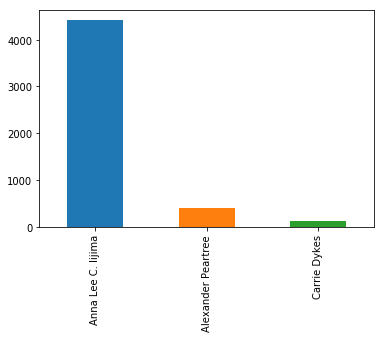

In [187]:
reviewsWithNullTasterNameOrTwitterHandle['taster_name'].value_counts().plot.bar()

In [186]:
reviewsWithNullTasterNameOrTwitterHandle[ reviewsWithNullTasterNameOrTwitterHandle['taster_name'].notnull() ] 

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
15,15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking
19,19,US,"Red fruit aromas pervade on the nose, with cig...",NaN,87,32.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Meritage (Virginia),Meritage,Quiévremont
20,20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont
76,76,Germany,Earthy pollen and mineral notes lend a savory ...,NaN,86,9.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Schmitt Söhne 2015 Riesling (Rheinhessen),Riesling,Schmitt Söhne
85,85,Germany,"Pronounced dust, pollen and earth tones lend s...",Undone Dry,86,10.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,P.J. Valckenberg 2015 Undone Dry Riesling (Rhe...,Riesling,P.J. Valckenberg
97,97,US,A wisp of bramble extends a savory tone from n...,Ingle Vineyard,88,20.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Heron Hill 2015 Ingle Vineyard Riesling (Finge...,Riesling,Heron Hill
100,100,US,"Fresh apple, lemon and pear flavors are accent...",NaN,88,18.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Ventosa 2015 Pinot Gris (Finger Lakes),Pinot Gris,Ventosa
101,101,US,"Dusty mineral, smoke and struck flint lend a s...",Red Oak Vineyard,87,20.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Lamoreaux Landing 2014 Red Oak Vineyard Riesli...,Riesling,Lamoreaux Landing
